## Module 2: Regression Homework


In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2025-05-20 14:07:33--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.01s   

2025-05-20 14:07:33 (24.7 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [2]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('laptops.csv')


In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Understanding the data

We have the data of Laptops with certain features and we ideally want to predict the final Price of the laptop given those features.

In [6]:
# features of the data
df.columns


Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [15]:
# Let's clean the columns up and prepare them

df.columns = df.columns.str.lower() #lower all the names
df.columns = df.columns.str.replace(' ', '_') #replace spaces with underscores

In [16]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [17]:
## let's look at the data type
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

Most of the features are objects in data frame, that is they are represented as string (and can later be understood as categorical variables); let's clean the data up with a similar process


In [25]:
# cleaning the internal data
for feature in df.columns:
    if df[feature].dtypes == 'object':
        df[feature] = df[feature].str.lower().str.replace(' ', '_')
print('Cleaning done.')

Cleaning done.


In [26]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


Okay, now we have a cleaner data set that is more conducive to analysis and fiting. 
Before trying to build a model, let's explore the general distribution of the data. We can do that by plotting the histograms of the data.

<Axes: xlabel='final_price', ylabel='Count'>

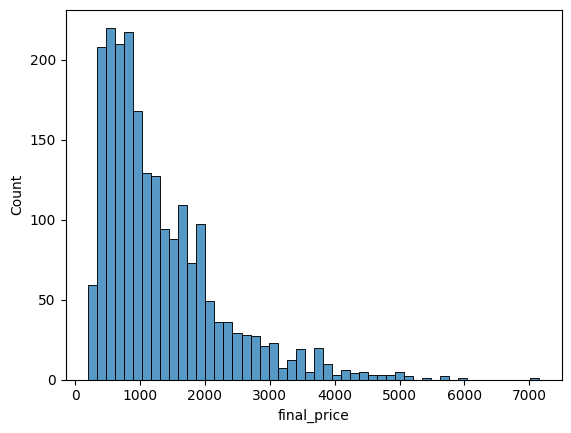

In [29]:
# Target Variable is final_price

sns.histplot(df.final_price, bins = 50)

From above, we see that the model has a long tail. Therefore, we know that we cannot (or atleast it will not be that good) directly train a ML regression model to predict the price distribution as it is. To make it more viable, we flatten the tails by normalising the distribution which is done by taking the log of the price.

In [32]:
# Take the log of the data

log_price = np.log1p(df.final_price.values)

In [33]:
log_price

array([6.91770561, 5.70378247, 6.67203295, ..., 8.13182184, 7.55013008,
       7.43896571], shape=(2160,))

<Axes: ylabel='Count'>

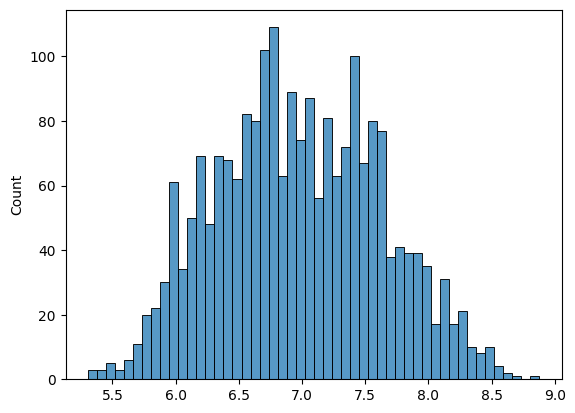

In [34]:
sns.histplot(log_price, bins = 50)

Now we can see that the distribution approximates a guassian distribution. THis mean much better for our ML models as a predictive model towards the final price of the laptops.

Since the final price would be dependent on some linear combination of the input features, let's understand some detail of how the final price seems to be correlated with the final price.
Initialy, let's plot the correlation of ram to the final price
 

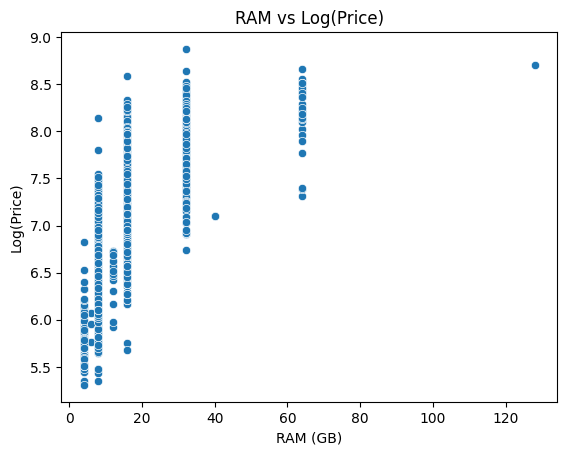

In [42]:
sns.scatterplot(x=df.ram, y=log_price)
plt.xlabel('RAM (GB)')
plt.ylabel('Log(Price)')
plt.title('RAM vs Log(Price)')
plt.show()



We can't tell much, just that there is a general trend of increase in Ram caused increase in the log(price) and conseqently the price, the log(prices) seem to asymptote.
We can do this automatize this sort of analyis by plotting the correlation matrix but we won't do that here.

## Input features 

For this exercise, we are told to use the input features of ram, storage, screen to predict the final price.

In [48]:
base_features = ['ram', 'storage', 'screen'] 
target = ['final_price']

In [49]:
# let's check for missing values
df[base_features + target].isnull().sum()



ram            0
storage        0
screen         4
final_price    0
dtype: int64

We see from above that only the screen column has empty values, 4 to be exact

In [50]:
# statistics for the ram
df.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

In [54]:
print('The median of the ram data is 16 GB.')

The median of the ram data is 16 GB.


In [52]:
df.ram.nunique() #how many unique values of ram

9

In [53]:
df.ram.unique() #what are the unique values of ram


array([  8,  16,  32,  12,   4,  64, 128,   6,  40])

<Axes: xlabel='ram', ylabel='Count'>

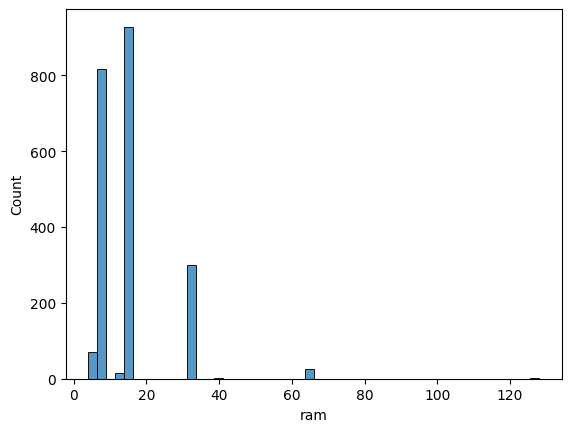

In [51]:
sns.histplot(df.ram, bins = 50)

## Preparing and shuffling the data set

In [56]:
# we don't need the full data set for now, let' only keep the ones we need for this analysis

base_df = df[base_features + target_feature]

In [84]:
base_df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [123]:
## 
def shuffle_dataset(df, seed = 42):
    np.random.seed(seed)
    indices = np.arange(len(df))
    np.random.shuffle(indices)

    #we want a split of 60/20/20
    ntrain = int(0.6 * len(df))
    nval = int(0.2 * len(df))
    ntest = len(df) - ntrain - nval
    print(f'The split of data is {ntrain, nval, ntest} with total of {len(df)} samples in the dataset')

    ## For the data matrix
    train = df.iloc[indices[:ntrain]]
    val = df.iloc[indices[ntrain: ntrain + nval]]
    test = df.iloc[indices[ntrain+nval:]]

    ## Reset the index here
    train = train.reset_index(drop = True)
    val = val.reset_index(drop = True)
    test = val.reset_index(drop = True)
    
    return train, val, test


In [86]:
train_df, val_df, test_df = shuffle_dataset(base_df)

The split of data is (1296, 432, 432) with total of 2160 samples in the dataset


In [88]:
train_df.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [89]:
def get_target_vector(df, feature, log = True, remove = True):
    #returns the target values as np array
    #removes the target from the data if remove is True
    ytarget = df[feature]
    if log:
        ytarget = np.log1p(ytarget.values)
    if remove:
        del df[feature]
    return ytarget

In [90]:
y_train = get_target_vector(train_df, target_feature[0])
y_val = get_target_vector(val_df, target_feature[0])
y_test = get_target_vector(test_df, target_feature[0])

print(y_test)

[7.86326672 6.90775528 6.17019634 7.32646561 6.00139013 6.74523635
 7.3115924  6.72143775 6.10924758 8.24794549 7.13933514 7.54960917
 6.78773224 7.09007684 6.38181602 7.09007684 5.53101513 6.89770494
 7.25135208 6.2146081  6.12102243 6.63138235 7.32711672 6.34814199
 8.36660051 6.03975459 7.19758504 7.54960917 7.54961443 6.18517929
 7.64969262 7.86327057 6.56667243 6.23441073 7.21971524 7.74846002
 6.63333159 7.15807032 7.54960917 7.17012724 7.10497366 7.97280734
 6.62007321 6.29156914 6.62007321 6.49885427 7.57558978 8.2160908
 6.82634998 7.98989937 6.91770561 6.57786136 7.31277362 7.17011954
 6.80461452 6.38012254 7.60579547 6.7580945  7.05875815 6.70033743
 7.60090246 6.24999455 7.48380669 6.40867705 5.81484669 7.31322705
 6.64476582 5.79301361 6.68461173 6.27287701 6.77992191 6.25575004
 7.69943472 6.9445307  6.62007321 7.20785987 6.25311702 7.85514925
 6.33546197 7.60090246 5.85793315 6.08677473 6.68461173 6.75901162
 6.45416029 7.27931884 6.50955869 6.7521886  6.86275791 6.19440

We have missing values in screen that we want to take care of.
We have two options, we can either fill it with 0 or fill it with the mean of the particular variable (screen)


In [91]:
def train_linear_model(X, y):
    # Check if number of samples match
    assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    # More efficient matrix multiplication
    return XTX_inv @ (X.T @ y)


In [92]:
def prepare_X_0(some_df):
    ## Incase we mutate the original dataset
    some_df = some_df.copy()
    #we are filling the null values with zero
    some_df = some_df.fillna(0)
    X = some_df.values #np array

    ones  = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    return X


X_train = prepare_X_0(train_df)
y_train = y_train
print(X_train)

[[   1.    32.  1000.    15.6]
 [   1.     4.    64.    14.1]
 [   1.    32.  1000.    14. ]
 ...
 [   1.    16.   512.    15.6]
 [   1.    16.   512.    14. ]
 [   1.    16.   512.    14. ]]


In [93]:
# Let's find the weights vector now

w1 = train_linear_model(X_train, y_train)
print(w1)

[ 6.72716371e+00  2.63058882e-02  6.60406396e-04 -3.65190853e-02]


In [77]:
def linear_model(X, w):
    return X.dot(w)


In [127]:
def rmse(ytrue, ypreds):
    error = ytrue - ypreds
    mse = (error**2).mean()
    return np.sqrt(mse)

X_val =  prepare_X_0(val_df)
y_val = y_val
y_val_pred = linear_model(X_val, w1)
print(f'The root mean squared using the weights from 0 filling is {round(rmse(y_val, y_val_pred), 2)}')

The root mean squared using the weights from 0 filling is 0.43


Alternativley, we can use the mean of the missing data. Earlier we said that the missing data is only in the screen section

In [128]:
mean_screen = base_df.screen.mean()
print(mean_screen)

15.168112244897959


In [129]:

def prepare_X_1(some_df, mean = mean_screen):
    ## Incase we mutate the original dataset
    some_df = some_df.copy()
    #we are filling the null values with zero
    some_df = some_df.fillna(mean)
    X = some_df.values #np array

    ones  = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    return X

X_train = prepare_X_1(train_df, mean_screen)
y_train = y_train

w2 = train_linear_model(X_train, y_train)

print(w2)

[ 6.85553804e+00  2.65024928e-02  6.66423259e-04 -4.53413597e-02]


In [131]:
X_val =  prepare_X_0(val_df)
y_val = y_val
y_val_pred = linear_model(X_val, w2)
print(f'The root mean squared using the weights from mean filling is {round(rmse(y_val, y_val_pred), 2)}')

The root mean squared using the weights from mean filling is 0.43


Since we do evaluation quite  a lot. I will make a helper funciton for this

In [132]:
def evaluate(Xtest, ytest, w, metric = rmse):
    yhats = linear_model(Xtest, w)
    return metric(ytest, yhats)

print(evaluate(X_val, y_val, w2, rmse))

0.4290504232578434


The two options don't make that much difference for the RMSE>

Okay, now let's try to add a regularizer so that we can train a regularise linear regression

In [105]:
def train_linear_model_r(X, y, r = 0.01):
    X = X + np.ones(X.shape)* r
    return train_linear_model(X, y)



In [110]:
w3 = train_linear_model_r(X_train, y_train)
print(round(evaluate(X_val, y_val, w3, rmse), 2))

9.01


In [133]:
r = [0, 0.01, 0.1, 1, 5, 10, 100]
best_r = None
min_rmse = float('inf')
for ir in r:
    wi = train_linear_model_r(X_train, y_train, r= ir)
    rmse_val = evaluate(X_val, y_val, wi, metric = rmse)
    if rmse_val < min_rmse:
        best_r = ir
        min_rmse = rmse_val

print(best_r, min_rmse)

0 0.429050423257842


The best r value is 0 with a minimum rmse of 8.91

Let's try to understand how the seed affects our scores

In [140]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seed_performance = []
for seed in seed_values:
    train, val, _ = shuffle_dataset(base_df, seed)
    ytrain, yval = get_target_vector(train, 'final_price'), get_target_vector(val, 'final_price')
    Xtrain, Xval = prepare_X_0(train), prepare_X_0(val)
    wi = train_linear_model(Xtrain, ytrain)
    seed_score = evaluate(Xval, yval, wi)
    seed_performance.append(round(seed_score,3))

print(round(np.mean(seed_performance), 2))
print(round(np.std(seed_performance), 2))



The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
The split of data is (1296, 432, 432) with total of 2160 samples in the dataset
0.44
0.01


In [141]:
print(f'The std of the rmse over the seed is 0.01, the performances are closeby')

The std of the rmse over the seed is 0.01, the performances are closeby


In [154]:
seed = 9

train, val, test = shuffle_dataset(base_df, seed = seed)


The split of data is (1296, 432, 432) with total of 2160 samples in the dataset


In [155]:
train

,ram,storage,screen,final_price
0,32,1000,15.6,1592.89
1,8,512,13.3,1349.00
2,8,512,15.6,549.00
3,32,1000,17.3,2999.00
4,16,1000,16.0,1889.00
...,...,...,...,...
1291,16,1000,15.6,1849.00
1292,16,512,15.6,794.74
1293,8,128,15.6,429.01
1294,16,1000,17.3,1599.00


In [156]:
large_train = pd.concat([train, val])

In [157]:
large_train = large_train.reset_index(drop = True)


In [158]:
large_train.head()


,ram,storage,screen,final_price
0,32,1000,15.6,1592.89
1,8,512,13.3,1349.00
2,8,512,15.6,549.00
3,32,1000,17.3,2999.00
4,16,1000,16.0,1889.00


In [159]:
y_train = get_target_vector(large_train, 'final_price')
y_train

array([7.37393285, 7.20785987, 6.30991828, ..., 6.74523635, 6.56939727,
       6.65930674], shape=(1728,))

In [161]:
X_train = prepare_X_0(large_train)
y_train  = y_train
w = train_linear_model_r(X_train, y_train, r= 0.001)

w

array([ 6.75069863e+00,  2.67742537e-02,  7.03116385e-04, -4.08711815e-02])

In [162]:
y_test = get_target_vector(test, 'final_price')
X_test = prepare_X_0(test)

RMSE = evaluate(X_test, y_test, w)
print(f'The RMSE we get is {round(RMSE, 2)}')

The RMSE we get is 0.4
